# Linear Regression

Load the usual libraries + statsmodels used for regression analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import statsmodels.api as sm

Run regression through points (x,y) = [(0,0),(1,1),(2,1),(3,2)].

In [37]:
x=[0,1,2,3]
y=[0,1,1,2]

x = np.asarray(x)
y = np.asarray(y)

model = sm.OLS(y,sm.add_constant(x))

coefs = model.fit().params
residuals = model.fit().resid

print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     18.00
Date:                Tue, 05 Nov 2019   Prob (F-statistic):             0.0513
Time:                        12:58:33   Log-Likelihood:                0.31571
No. Observations:                   4   AIC:                             3.369
Df Residuals:                       2   BIC:                             2.141
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1000      0.265      0.378      0.7

C:\Users\Jan Vecer\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [38]:
model2 = sm.OLS(y,x)

coefs2 = model2.fit().params
residuals2 = model2.fit().resid

print(model2.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              81.00
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                     0.00290
Time:                        12:59:42   Log-Likelihood:                         0.17772
No. Observations:                   4   AIC:                                      1.645
Df Residuals:                       3   BIC:                                      1.031
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Jan Vecer\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Plot the points with the regression line.

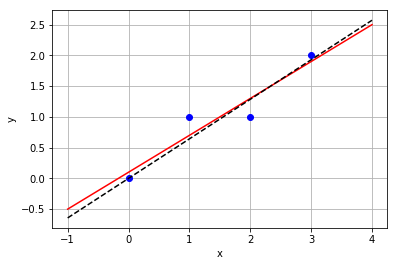

In [39]:
plt.figure(1)
plt.plot(x,y,'bo',ms=6)

xx=np.linspace(np.min(x)-1,np.max(x)+1,100)
plt.plot(xx,coefs[0]+coefs[1]*xx,'r')

plt.plot(xx,coefs2[0]*xx,'k',linestyle='--')

plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()

Residuals.

In [40]:
print(residuals)

[-0.1  0.3 -0.3  0.1]


They sum up to one. Except the computer has a limited precision and thus this is only a technical zero.

This serves as a warning not to test for the exact zero (x == 0) in the Python code. One should use tests using a precision, like (np.abs(x) < epsilon). 

In [6]:
np.sum(residuals)

-7.771561172376096e-16

Residuals u are orthogonal to data x.

In [7]:
print(residuals*x)

[-0.   0.3 -0.6  0.3]


Again, it should add to zero, or at least be close to it.

In [8]:
np.sum(residuals*x)

-2.3314683517128287e-15

This is the standard deviation of the slope. It is listed in the regression printout table.

In [355]:
std = np.sqrt((np.sum(residuals**2)/2)/np.sum((x-np.mean(x))**2))
print(std)

0.1414213562373095


This is the T statistics. How far is the coefficient b from zero in terms of standard deviations.

In [356]:
t = coefs[1]/std
print(t)

4.2426406871192865


And what is the probability that this happens randomly from a distribution with zero mean? This is known as a P-value.

In [358]:
2*(1-sp.t.cdf(t,2))

0.05131670194948601

We used the t-distribution as the exact value of the std is not known and it has to be estimated form the data. This leads to a distribution with fatter tails. Let us plot the t distribution with various degrees of freedom (n=1,2,3,4). The blue function is the normal distribution. 

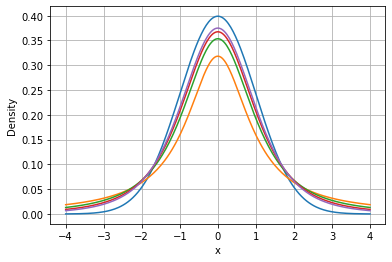

In [331]:
xx = np.linspace(-4,4,250)

plt.figure(2)
plt.plot(xx,sp.norm.pdf(xx))

for i in range(1,5):
    plt.plot(xx,sp.t.pdf(xx,i))


plt.xlabel('x')
plt.ylabel('Density')
plt.grid()
plt.show()

Obviously 

t(n-1) -> N(0,1)

since S**2 -> sigma**2

This means that the respective quantiles of the t-distribution will get closer to the normal quantiles. 

Here is the example of the 97.5% quantile. It get down to 2 relatively quickly, meaning that one should be mostly aware for possible large deviations when the number of data is very small.

In [345]:
for i in range(1,31):
    print(i,sp.t.ppf(0.975,i,0,1))

1 12.706204736432095
2 4.302652729911275
3 3.182446305284263
4 2.7764451051977987
5 2.5705818366147395
6 2.4469118487916806
7 2.3646242510102993
8 2.3060041350333704
9 2.2621571627409915
10 2.2281388519649385
11 2.200985160082949
12 2.1788128296634177
13 2.1603686564610127
14 2.1447866879169273
15 2.131449545559323
16 2.1199052992210112
17 2.1098155778331806
18 2.10092204024096
19 2.093024054408263
20 2.0859634472658364
21 2.079613844727662
22 2.0738730679040147
23 2.0686576104190406
24 2.0638985616280205
25 2.059538552753294
26 2.055529438642871
27 2.0518305164802833
28 2.048407141795244
29 2.045229642132703
30 2.0422724563012373


The 97.5% quantile of the t distribution gets below 2 for 61 degrees of freedom.

In [346]:
i=1
while sp.t.ppf(0.975,i,0,1) > 2:
    i=i+1
print(i,sp.t.ppf(0.975,i,0,1))    

61 1.9996235841149779


# ECB Exchange Rate Data

Load pandas libraries.

In [2]:
from pandas_datareader import data 
import pandas as pd

And specific libraries needed for ECB FX rates data.

In [4]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO

The ECB updates the FX rates file daily on their website. The code downloads it, unzips it and reads it as the dataframe.

In [41]:
z = urlopen("https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist.zip")
myzip = ZipFile(BytesIO(z.read())).extract('eurofxref-hist.csv')
df = pd.read_csv(myzip)

In [42]:
df.head()

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
0,2019-11-04,1.1158,120.93,1.9558,NaN,25.511,7.4713,NaN,0.86368,328.78,...,78.9205,1296.92,21.3095,4.6311,1.7358,56.376,1.5146,33.689,16.5296,NaN
1,2019-11-01,1.1139,120.43,1.9558,NaN,25.514,7.4712,NaN,0.86008,328.33,...,78.8160,1300.09,21.3164,4.6400,1.7326,56.286,1.5129,33.623,16.8280,NaN
2,2019-10-31,1.1154,120.73,1.9558,NaN,25.509,7.4708,NaN,0.86133,328.70,...,79.1125,1302.87,21.3265,4.6607,1.7359,56.704,1.5174,33.668,16.9120,NaN
3,2019-10-30,1.1106,120.99,1.9558,NaN,25.512,7.4709,NaN,0.86200,329.72,...,78.7705,1297.21,21.2538,4.6423,1.7504,56.591,1.5141,33.580,16.5609,NaN
4,2019-10-29,1.1095,120.88,1.9558,NaN,25.543,7.4706,NaN,0.86328,328.78,...,78.6150,1295.86,21.1812,4.6410,1.7481,56.623,1.5121,33.524,16.2241,NaN


Let us drop the currencies with missing values (usually minor currencies). The second command reorders the data starting from the oldest observation (January 1999). Use Date as an index and insert a constant EUR/EUR exchange rate = 1 (useful in automated currency conversion).

In [43]:
df1 = df.dropna(axis='columns')
df1 = df1[::-1]
df1 = df1.reset_index(drop=True)
df1.insert(1, 'EUR', 1)

In [44]:
df1.head()

,Date,EUR,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
0,1999-01-04,1,1.1789,133.73,35.107,7.4501,0.71110,251.48,4.0712,9.4696,1.6168,8.8550,1.9100,1.8004,9.1332,1398.59,2.2229,1.9554,6.9358
1,1999-01-05,1,1.1790,130.96,34.917,7.4495,0.71220,250.80,4.0245,9.4025,1.6123,8.7745,1.8944,1.7965,9.1341,1373.01,2.2011,1.9655,6.7975
2,1999-01-06,1,1.1743,131.42,34.850,7.4452,0.70760,250.67,4.0065,9.3050,1.6116,8.7335,1.8820,1.7711,9.1010,1359.54,2.1890,1.9699,6.7307
3,1999-01-07,1,1.1632,129.43,34.886,7.4431,0.70585,250.09,4.0165,9.1800,1.6165,8.6295,1.8474,1.7602,9.0131,1337.16,2.1531,1.9436,6.8283
4,1999-01-08,1,1.1659,130.09,34.938,7.4433,0.70940,250.15,4.0363,9.1650,1.6138,8.5900,1.8406,1.7643,9.0302,1366.73,2.1557,1.9537,6.7855


Keep dates in a convenient format.

In [45]:
Dates = pd.to_datetime(df1['Date'], format='%Y-%m-%d')

EUR/USD exchange rate plotted. Note that the price process is not smooth (no derivative).

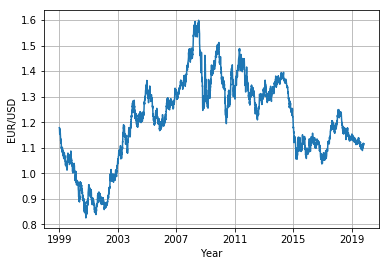

In [49]:
plt.figure(3)
plt.plot(Dates,df1['USD'])
plt.xlabel('Year')
plt.ylabel('EUR/USD')
plt.grid()
plt.show()

In [50]:
df1 = df1.set_index('Date')

In [51]:
fxreturns = df1.apply(np.log).diff()

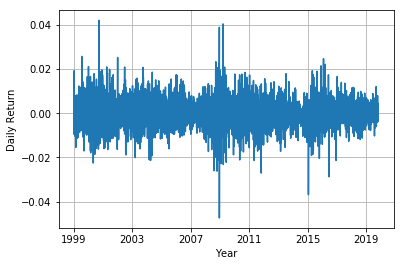

In [52]:
plt.figure(4)
plt.plot(Dates,fxreturns['USD'])
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.grid()
plt.show()

In [53]:
np.mean(fxreturns['USD'])

-1.0311183483908937e-05

In [54]:
np.std(fxreturns['USD'])

0.006144945614545791

In [100]:
np.sqrt(250)*np.std(fxreturns['USD'])

0.09735080896101331

In [101]:
sp.norm.ppf(0.05)*np.std(fxreturns['USD'])

-0.010127373267890491

In [14]:
np.quantile(fxreturns['USD'][1:],0.05)

-0.009902548664567874

In [55]:
cvar_data = fxreturns['USD'][fxreturns['USD']<=-0.009902548664567874]

In [18]:
cvar_data

Date
1999-01-28   -0.010375
1999-02-22   -0.015437
1999-03-29   -0.011438
1999-04-16   -0.011000
1999-08-16   -0.010745
1999-09-13   -0.017065
2000-01-07   -0.010062
2000-01-17   -0.012895
2000-01-28   -0.012914
2000-02-24   -0.017029
2000-02-28   -0.017891
2000-03-14   -0.009930
2000-03-22   -0.010153
2000-04-26   -0.011787
2000-05-03   -0.022520
2000-05-17   -0.015901
2000-05-25   -0.012943
2000-06-09   -0.018583
2000-06-15   -0.011691
2000-06-20   -0.010637
2000-07-13   -0.015917
2000-07-19   -0.014756
2000-07-28   -0.012108
2000-08-02   -0.013257
2000-08-03   -0.012548
2000-08-14   -0.013339
2000-08-21   -0.011460
2000-09-05   -0.012748
2000-09-07   -0.016234
2000-09-11   -0.014530
                ...   
2015-03-10   -0.011297
2015-03-11   -0.015012
2015-03-27   -0.010720
2015-04-10   -0.019116
2015-05-19   -0.018522
2015-05-25   -0.016801
2015-06-23   -0.012506
2015-07-13   -0.012234
2015-07-16   -0.012982
2015-08-27   -0.010403
2015-09-21   -0.014911
2015-10-23   -0.020450
2015-1

In [56]:
np.mean(cvar_data)

-0.013636564625227741

In [58]:
fit_to_n = sp.norm.fit(fxreturns['USD'][1:])
print(fit_to_n)

(-1.0311183483908899e-05, 0.006144945614545785)


In [59]:
fit_to_t = sp.t.fit(fxreturns['USD'][1:])
print(fit_to_t)

(5.322491831891064, 1.403265349448498e-06, 0.004881242225825406)


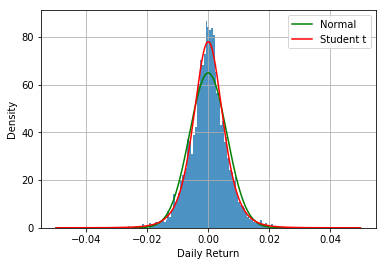

In [60]:
x = np.linspace(-0.05,0.05,4000)

plt.figure(5)
plt.hist(fxreturns['USD'][1:],density=True, bins = 150, alpha=0.8)
plt.plot(x,sp.norm.pdf(x,np.mean(fxreturns['USD']),np.std(fxreturns['USD'])), color='g', label='Normal')
plt.plot(x,sp.t.pdf(x, fit_to_t[0], fit_to_t[1], fit_to_t[2]), color = 'r', label='Student t')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    USD   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     2907.
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:22:35   Log-Likelihood:                 20757.
No. Observations:                5335   AIC:                        -4.151e+04
Df Residuals:                    5333   BIC:                        -4.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.125e-06   6.77e-05     -0.017      0.9

C:\Users\Jan Vecer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


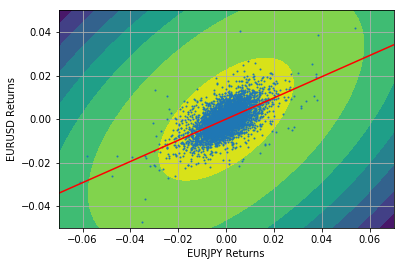

In [61]:
plt.figure(6)
plt.plot(fxreturns['JPY'],fxreturns['USD'],'.', ms=2)
plt.xlim(-0.07,0.07)

model1 = sm.OLS(fxreturns['USD'],sm.add_constant(fxreturns['JPY']),missing='drop')
print(model1.fit().summary())

x=np.linspace(-0.07,0.07,1000)
coefs = model1.fit().params
plt.plot(x,coefs[0]+coefs[1]*x,'r')

xx, yy = np.mgrid[-0.07:0.072:.002, -0.05:0.052:.002]
pos = np.dstack((xx, yy))
rv = sp.multivariate_normal([np.mean(fxreturns['USD'][1:]),np.mean(fxreturns['JPY'][1:])], np.corrcoef(fxreturns['USD'][1:],fxreturns['JPY'][1:]))
plt.contourf(xx, yy, rv.pdf(pos))


plt.xlabel('EURJPY Returns')
plt.ylabel('EURUSD Returns')
plt.grid()
plt.show()

In [121]:
np.mean(fxreturns['USD'][1:])

-1.4164294439868073e-05

In [122]:
np.mean(fxreturns['JPY'][1:])

-2.3236040331968203e-05

In [123]:
np.corrcoef(fxreturns['USD'][1:],fxreturns['JPY'][1:])

array([[1.        , 0.59398248],
       [0.59398248, 1.        ]])

In [62]:
LR_EURUSD_T = fxreturns['USD'][2:]
LR_EURUSD_Y = fxreturns['USD'][1:len(fxreturns['USD'])-1]

In [125]:
LR_EURUSD_T.head()

Date
1999-01-06   -0.003994
1999-01-07   -0.009497
1999-01-08    0.002318
1999-01-11   -0.007749
1999-01-12   -0.004244
Name: USD, dtype: float64

In [126]:
LR_EURUSD_Y.head()

Date
1999-01-05    0.000085
1999-01-06   -0.003994
1999-01-07   -0.009497
1999-01-08    0.002318
1999-01-11   -0.007749
Name: USD, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1260
Date:                Tue, 05 Nov 2019   Prob (F-statistic):              0.723
Time:                        13:30:28   Log-Likelihood:                 19592.
No. Observations:                5334   AIC:                        -3.918e+04
Df Residuals:                    5332   BIC:                        -3.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.038e-05   8.42e-05     -0.123      0.9

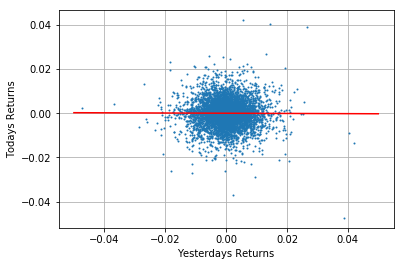

In [63]:
plt.figure(7)
plt.plot(LR_EURUSD_Y,LR_EURUSD_T,'.', ms=2)

model = sm.OLS(LR_EURUSD_T.values,sm.add_constant(LR_EURUSD_Y.values))
print(model.fit().summary())

coefs = model.fit().params

xx=np.linspace(-0.05,0.05,4000)
plt.plot(xx,coefs[0]+coefs[1]*xx,'r')

plt.xlabel('Yesterdays Returns')
plt.ylabel('Todays Returns')

#plt.xlim([-0.005,0.005])

plt.grid()
plt.show()

# Getting SP500 Financial Data: Yahoo

Downloading financial data can be tricky as the data sources often change format. This implementation works as in September 2019.

Start with extracting the current components of the SP500 index. The current components are listed on Wikipedia page. We are primarily interested in tickers, so let us get them in the corresponding list called 'tickers'.

In [3]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = table['Symbol'].tolist()

In [4]:
table.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [66]:
tickers[0:10]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES']

The tickers in Wikipedia page have a slight inconsistency with Yahoo finance tickers, namely Wikipedia uses a dot '.' for some tickers in contrast to a dash '-' notation used in Yahoo. This needs to be corrected.

In [5]:
for i in range(len(tickers)):
    tickers[i] = tickers[i].replace(".","-")

Add the SP500 index itself to the ticker list: '^GSPC'.

In [6]:
tickers.append('^GSPC')

The import part itself, starting at some fixed time, ending at the current time.

Downloading data takes some time, be patient.

In [7]:
import time

start_date = '2019-01-01'
end_date = time.strftime("%Y-%m-%d")

sp500 = data.DataReader(tickers, 'yahoo', start_date, end_date)['Adj Close']

In [11]:
sp500[tickers].head()

Symbols,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,183.068054,67.791504,82.106827,309.959991,137.682632,46.350380,224.570007,18.830000,157.235001,13.495584,...,46.639339,19.286905,85.283569,65.474289,89.536743,156.240005,101.280602,40.154263,83.688446,2510.030029
2019-01-03,176.174835,64.592140,79.401527,302.290009,132.981903,44.704514,215.699997,17.049999,162.143646,13.486069,...,46.455570,18.865334,82.072556,63.229786,87.284607,146.880005,99.448669,39.932148,80.795799,2447.889893
2019-01-04,183.422806,66.435669,81.959602,313.440002,138.152725,46.488358,226.190002,19.000000,158.121140,13.933384,...,46.910160,19.593504,85.872749,65.897575,89.556320,152.970001,102.845154,41.158604,83.965828,2531.939941
2019-01-07,183.000946,67.430595,83.155823,314.799988,138.632599,47.799141,229.259995,20.570000,160.441040,14.000006,...,46.707050,20.015074,88.141090,64.922997,89.458405,155.289993,102.884758,41.322777,84.471039,2549.689941
2019-01-08,183.767899,66.621002,83.542290,318.420013,142.138565,49.247898,232.679993,20.750000,159.325897,14.323593,...,47.248684,20.676178,86.461929,65.533348,89.282150,156.330002,100.577530,41.699402,85.729149,2574.409912


It is worth to save them for the future references, so it can be uploaded from the .csv file later.

In [19]:
sp500[tickers].to_csv('sp500.csv')

The structure of the dataframe is the following.

In [9]:
sp500.head()

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,64.968681,31.963160,157.235001,155.214005,82.106827,72.719398,309.959991,67.791504,137.682632,224.570007,...,65.563515,37.520115,19.286905,65.474289,89.536743,101.280602,156.240005,40.154263,83.688446,2510.030029
2019-01-03,62.575249,29.581665,162.143646,139.753540,79.401527,71.664497,302.290009,64.592140,132.981903,215.699997,...,64.556870,37.539921,18.865334,63.229786,87.284607,99.448669,146.880005,39.932148,80.795799,2447.889893
2019-01-04,64.741203,31.530161,158.121140,145.719513,81.959602,72.494736,313.440002,66.435669,138.152725,226.190002,...,66.937065,38.629177,19.593504,65.897575,89.556320,102.845154,152.970001,41.158604,83.965828,2531.939941
2019-01-07,66.115929,32.425678,160.441040,145.395203,83.155823,73.012421,314.799988,67.430595,138.632599,229.259995,...,67.285156,39.322350,20.015074,64.922997,89.458405,102.884758,155.289993,41.322777,84.471039,2549.689941
2019-01-08,67.085175,31.904110,159.325897,148.166870,83.542290,73.793823,318.420013,66.621002,142.138565,232.679993,...,67.774361,39.054981,20.676178,65.533348,89.282150,100.577530,156.330002,41.699402,85.729149,2574.409912


As a computer exercise, the data can be deleted (make sure you saved them)!

In [10]:
del sp500

And reloaded from the previously saved .csv file. The date is the index, which is now the first column (=0) of the .csv file. 

In [50]:
sp500 = pd.read_csv('sp500.csv', index_col=0)

We have it back.

In [51]:
sp500.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,66.695694,52.006458,105.789520,167.701889,90.957497,91.112228,192.490005,57.017735,149.871857,177.699997,...,65.902611,78.854340,66.354515,27.771238,66.618118,79.217018,122.507782,48.687260,70.983826,2695.810059
2018-01-03,68.392677,51.368519,106.746803,167.672668,92.380867,91.451332,195.820007,57.143818,150.563538,181.039993,...,67.222992,80.403030,66.127213,27.733416,67.430420,79.149078,123.357033,48.629650,71.310211,2713.060059
2018-01-04,67.879646,51.692390,110.685616,168.451508,91.854034,91.247856,199.250000,57.046833,152.346329,183.220001,...,68.436569,80.514313,66.117325,28.073820,67.880608,79.954826,123.179283,48.831310,71.735512,2723.989990
2018-01-05,68.964928,51.672771,111.862274,170.369385,93.453026,92.352364,202.320007,57.211708,153.603058,185.339996,...,71.989967,80.449402,67.046333,28.281843,67.753387,80.420807,124.403770,48.850513,72.556412,2743.149902
2018-01-08,69.112915,51.162415,111.074501,169.736588,91.955704,93.883194,207.800003,57.046833,154.830551,185.039993,...,72.465683,80.811081,67.500954,28.612793,67.998055,80.556732,124.640770,48.610439,73.426773,2747.709961



Do you want to have all SP500 dating to the earliest history? Yahoo finance dates back to 1980-01-01.

In [22]:
import time

start_date = '1980-01-01'
end_date = time.strftime("%Y-%m-%d")

sp500all = data.DataReader(tickers, 'yahoo', start_date, end_date)['Adj Close']

Once it is in, we can check it. Note that most of the stock has no data entries in 1980.

In [23]:
sp500all.head()

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.076790,NaN,4.384870,NaN,NaN,NaN,NaN,NaN,105.760002
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.074830,NaN,4.330515,NaN,NaN,NaN,NaN,NaN,105.220001
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.075543,NaN,4.312393,NaN,NaN,NaN,NaN,NaN,106.519997
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.075186,NaN,4.267096,NaN,NaN,NaN,NaN,NaN,106.809998
1980-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.075721,NaN,4.593242,NaN,NaN,NaN,NaN,NaN,108.949997


Better save it.

In [24]:
sp500all.to_csv('sp500all.csv')

In [52]:
sp500all = pd.read_csv('sp500all.csv', index_col=0)

In [29]:
logreturns = sp500.apply(np.log).diff()

In [70]:
from datetime import datetime, timedelta

d = datetime.today() - timedelta(days = 366)
d.strftime("%Y-%m-%d")

Dates = pd.to_datetime(sp500.index, format='%Y-%m-%d')

logreturns1y = logreturns[Dates > d]

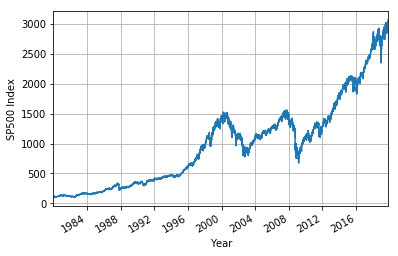

In [68]:
plt.figure(8)
sp500all['^GSPC'].plot()
plt.xlabel('Year')
plt.ylabel('SP500 Index')
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

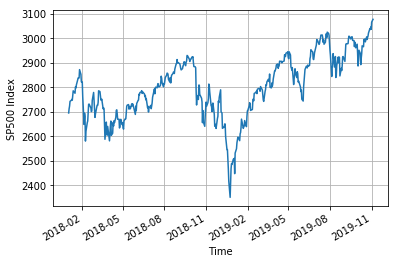

In [71]:
plt.figure(9)
fig, ax = plt.subplots(1)
ax.plot(Dates,sp500['^GSPC'])

fig.autofmt_xdate()
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.xlabel('Time')
plt.ylabel('SP500 Index')
plt.grid()
plt.show()

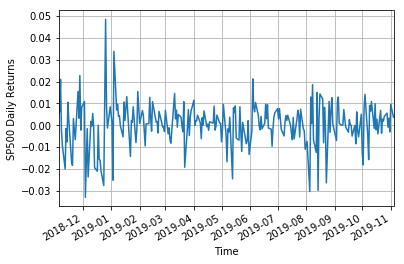

In [72]:
plt.figure(10)
logreturns1y['^GSPC'].plot()
plt.xlabel('Time')
plt.ylabel('SP500 Daily Returns')
plt.grid()
plt.show()

In [153]:
np.std(logreturns1y['^GSPC'])

0.010503033377861695

In [154]:
np.mean(logreturns1y['^GSPC'])

6.480924584127397e-05

In [61]:
x=np.linspace(-0.05,0.05,4000)

In [74]:
tfit = sp.t.fit(logreturns1y['^GSPC'])
print(tfit)

(2.919084556757569, 0.0012602911741841757, 0.006313085218724972)


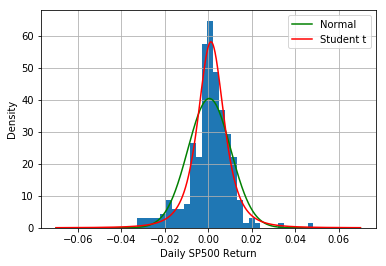

In [75]:
plt.figure(11)
plt.hist(logreturns1y['^GSPC'], bins=30, density=True)
plt.plot(x,sp.norm.pdf(x,np.mean(logreturns1y['^GSPC']),np.std(logreturns1y['^GSPC'])), color='g', label='Normal')
plt.plot(x,sp.t.pdf(x, tfit[0], tfit[1], tfit[2]), color = 'r', label='Student t')
plt.legend()
plt.xlabel('Daily SP500 Return')
plt.ylabel('Density')
plt.grid()
plt.show()

In [35]:
sigma = np.sqrt(250)*logreturns1y.std()
mu = 250*logreturns1y.mean()
names = sp500.columns

<Figure size 432x288 with 0 Axes>

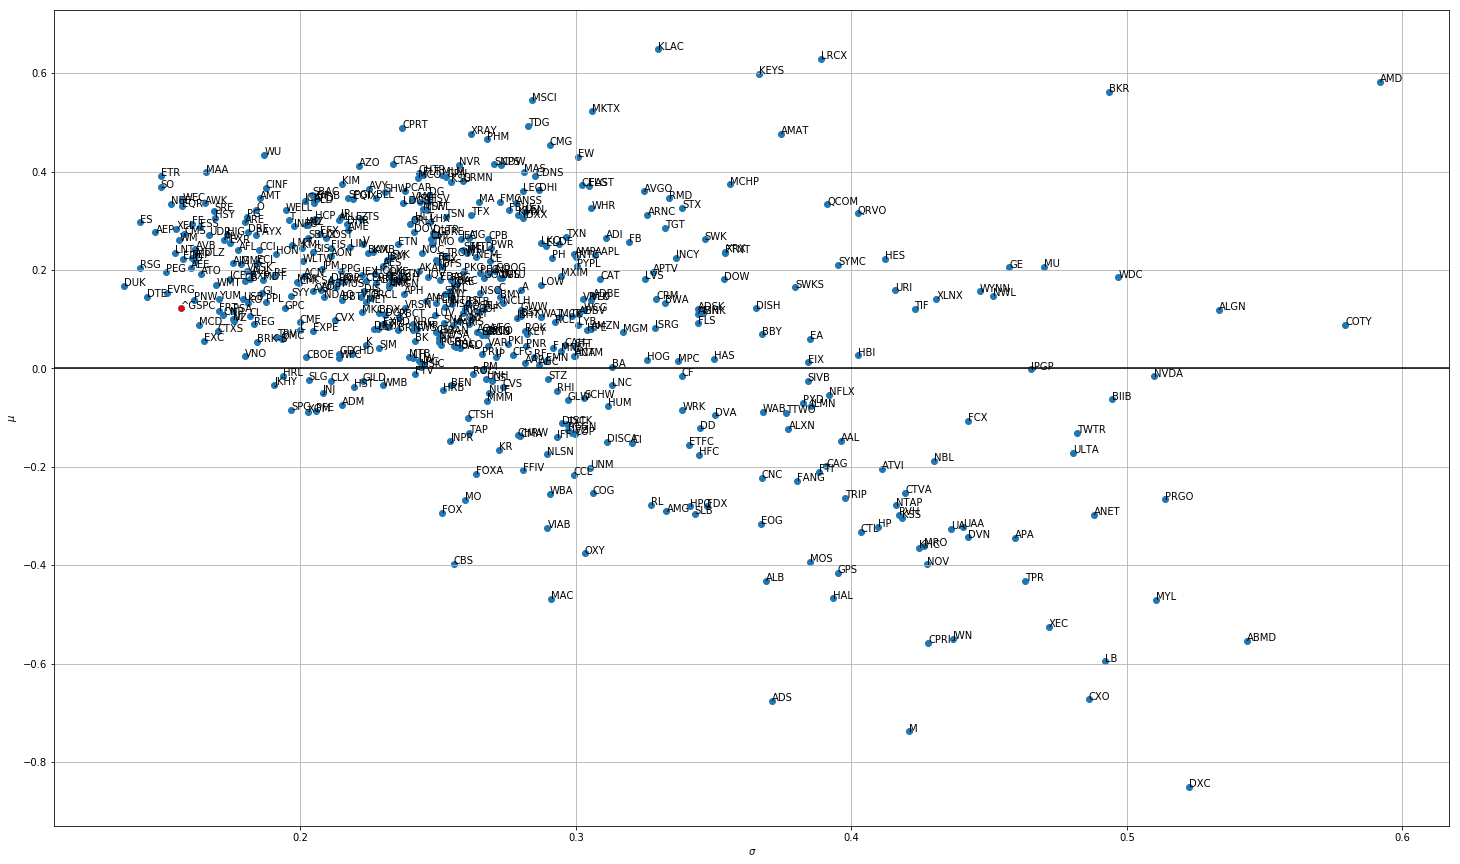

In [36]:
plt.figure(12)

fig, ax = plt.subplots(1, 1, figsize = (25, 15))

ax.scatter(sigma, mu)

# Highlight the index itself. It should have a small variance.

plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')


plt.plot(sigma[-1],mu[-1], 'ro', ms = 5)
#plt.plot(sigma["DIS"],mu["DIS"], 'ro', ms = 10)
#plt.plot(sigma["AAPL"],mu["AAPL"], 'ro', ms = 10)

# Add the ticker names.

for i, txt in enumerate(names):
    ax.annotate(txt, (sigma[i], mu[i]))
    
# Benchmark line. 
    
plt.axhline(y=0, color='k', linestyle='-')    
plt.grid()
plt.show()

In [164]:
sharpe = mu/sigma

# Print stocks with a high Sharpe ratio

print(sharpe[sharpe > 1.6])
print(len(sharpe[sharpe > 1.6]))

Symbols
AEE     1.629661
AEP     2.128377
AMT     2.258365
AWK     2.170322
BLL     2.190525
CINF    2.149630
CMG     1.914819
CMS     1.886089
CPRT    1.683181
DUK     1.639686
ED      1.633688
EQR     1.853547
ES      2.502921
ESS     1.817159
ETR     2.693379
EXR     1.907204
FE      1.863480
HCP     1.746258
HSY     2.489144
LNT     1.736063
MAA     1.738341
MCD     1.639568
MDLZ    1.624922
MKTX    1.933829
NEE     2.290757
O       1.841528
PG      2.245236
SBAC    1.892125
SBUX    1.982208
SO      2.604086
SRE     1.712958
VTR     1.740237
WEC     2.404358
WELL    1.905506
XEL     2.284501
dtype: float64
35


In [76]:
import statsmodels.api as sm

# Run CAPM regression, and store the results corresponding to alpha, beta, and
# statistical significance of alpha.

capm = pd.DataFrame(index=sp500.columns, columns=['alpha', 'beta', 'Pa-value'])


for i in range(len(sp500.columns)):
    model = sm.OLS(logreturns1y.iloc[:,i],sm.add_constant(logreturns1y.iloc[:,-1]), missing='drop')
    capm.iat[i,0] = 250*model.fit().params[0]
    capm.iat[i,1] = model.fit().params[1]
    capm.iat[i,2] = model.fit().pvalues[0]

In [77]:
capm

,alpha,beta,Pa-value
Symbols,,,
A,0.021666,1.13315,0.920652
AAL,-0.328555,1.48004,0.308536
AAP,-0.0739147,0.696926,0.77629
AAPL,0.0403149,1.55701,0.829326
ABBV,0.00132441,0.901138,0.996038
ABC,-0.0851797,0.753052,0.744993
ABMD,-0.747096,1.58744,0.123943
ABT,0.0418338,1.0818,0.783564
ACN,0.0664518,0.998838,0.600951


In [167]:
candidates = capm[capm['Pa-value'] < 0.05]  
print(candidates)
print(len(candidates))

            alpha      beta    Pa-value
Symbols                                
ADS     -0.626455   1.19931   0.0305588
AEP       0.32985   0.13344   0.0336376
AMG     -0.515729   1.24668   0.0369458
AMT      0.435234  0.313588    0.021329
AWK      0.370129  0.241244   0.0281332
BLL      0.494317  0.741884   0.0120437
CINF      0.42484  0.690607   0.0116403
CMG      0.550655  0.745191   0.0398003
CPRI    -0.771665   1.16344   0.0442146
CPRT     0.425563   1.04221   0.0321804
DXC      -1.14937   1.48731   0.0180807
ES       0.367368  0.175582   0.0119062
ETR      0.419625  0.172791  0.00695574
HAL     -0.755377    1.2468   0.0198157
HSY      0.431305  0.226948   0.0120986
KLAC     0.452637   1.50993   0.0481758
NEE      0.354481  0.181006   0.0214016
NKTR     -1.24394   1.49521   0.0461067
OXY     -0.543068  0.957907   0.0378877
PG       0.428415  0.476538   0.0164174
SBAC     0.393607  0.479731   0.0463004
SBUX     0.437729  0.739296   0.0224933
SLB     -0.540965   1.08112   0.0479612


In [78]:
low_beta = capm[capm['beta'] < 0.2]
print(low_beta)

            alpha      beta   Pa-value
Symbols                               
AEP      0.251799  0.199141  0.0820874
BKR      0.576488 -0.126485   0.359234
EVRG     0.133079  0.171755    0.37424
NEM      0.230403 -0.037552   0.383581
PSA      0.103127  0.103412   0.556531
WEC      0.319902  0.177554  0.0399002


                            OLS Regression Results                            
Dep. Variable:                    NEM   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.254
Date:                Sat, 28 Sep 2019   Prob (F-statistic):              0.264
Time:                        12:56:00   Log-Likelihood:                 653.27
No. Observations:                 251   AIC:                            -1303.
Df Residuals:                     249   BIC:                            -1295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      1.032      0.3

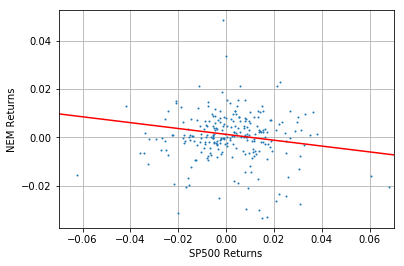

In [169]:
plt.figure(13)
plt.plot(logreturns1y['NEM'],logreturns1y['^GSPC'],'.', ms=2)
plt.xlim(-0.07,0.07)

model1 = sm.OLS(logreturns1y['NEM'],sm.add_constant(logreturns1y['^GSPC']),missing='drop')
print(model1.fit().summary())

x=np.linspace(-0.07,0.07,1000)
coefs = model1.fit().params
plt.plot(x,coefs[0]+coefs[1]*x,'r')


plt.xlabel('SP500 Returns')
plt.ylabel('NEM Returns')
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    NKE   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     263.2
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           7.05e-41
Time:                        12:57:54   Log-Likelihood:                 755.57
No. Observations:                 251   AIC:                            -1507.
Df Residuals:                     249   BIC:                            -1500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.421      0.6

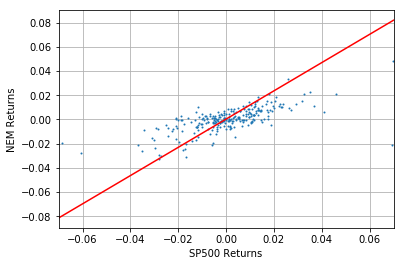

In [170]:
plt.figure(13)
plt.plot(logreturns1y['NKE'],logreturns1y['^GSPC'],'.', ms=2)
plt.xlim(-0.07,0.07)

model1 = sm.OLS(logreturns1y['NKE'],sm.add_constant(logreturns1y['^GSPC']),missing='drop')
print(model1.fit().summary())

x=np.linspace(-0.07,0.07,1000)
coefs = model1.fit().params
plt.plot(x,coefs[0]+coefs[1]*x,'r')


plt.xlabel('SP500 Returns')
plt.ylabel('NEM Returns')
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

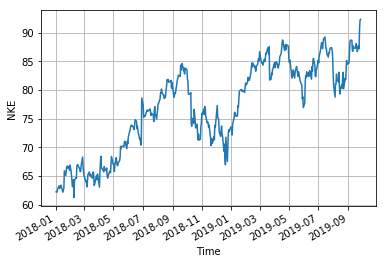

In [171]:
plt.figure(15)

fig, ax = plt.subplots(1)
ax.plot(Dates, sp500['NKE'])

fig.autofmt_xdate()
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.xlabel('Time')
plt.ylabel('NKE')


plt.grid()

plt.show()

In [172]:
alpha = capm['alpha']

In [173]:
np.mean(alpha)

-0.00842744326073196

In [174]:
np.std(alpha)

0.2640921416677302

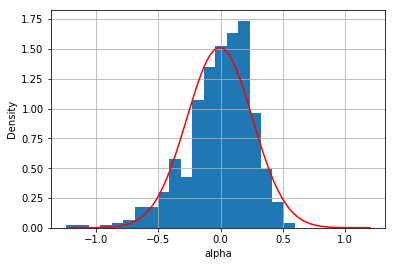

In [175]:
x=np.linspace(-1.2,1.2,4000)

plt.figure(20)
plt.hist(pd.to_numeric(alpha), density=True, bins=20)
plt.plot(x,sp.norm.pdf(x,np.mean(alpha),np.std(alpha)), color='r')
plt.xlabel('alpha')
plt.ylabel('Density')
plt.grid()
plt.show()